# <font color="880000">Lecture Support: Solow Growth Model: Initial and Alternative Scenarios: 2020-01-23</font>

In [1]:
# prepare the python environment with the numerical
# analysis package (np), the database package (pd), &
# the matlab clone plotting package (plt):

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# THESE ARE ALL QUANTITIES YOU CAN CHANGE AT WILL

# choose the model parameters:
n = 0.01 # the labor-force L proportional growth rate
g = 0.02 # the labor-efficiency E proportional growth rate
s = 0.12 # the share of production Y that is saved and invested
δ = 0.03 # the capital depreciation rate
θ = 1.00 # the elasticity of production Y with respect to capital 
         # intensity κ
         #
         # additional variables in the model: output per worker y; the
         # capital stock K

# choose starting values L_0, E_0, and κ_0 for the labor force, labor
# efficiency, and capital intensity:
L_0 = 1
E_0 = 1
κ_0 = 8

# choose the period at which something changes in the model:
T_alt = 50

# choose the parameter that changes:
Δs = 0.00 # a change in the savings-investment rate
Δg = 0.00 # a change in the labor-efficiency growth rate
Δn = 0.00 # a change in the labor-force growth rate
ΔK = -0.7 # proportional change in the capital stock (due, 
          # for example, to wartime destruction)
        
# choose the length of time for which the simulation will run:
T = 100



In [3]:
# initialize the list of labor force values for the initial scenario:
L = [L_0]

# calculate the labor force for the duration of the
# simulation:
for t in range(T):
    L = L + [L[t]*np.exp(n)]

# initialize the dataframe:
solow_df = pd.DataFrame()

# stuff the list of labor-force values into the dataframe:
solow_df['L'] = L

# initialize the list of labor efficiency values:
E = [E_0]

# calculate labor efficiency for the duration of the
# simulation:
for t in range(T):
    E = E + [E[t]*np.exp(g)]

# stuff the list of labor-efficiency values into the dataframe:
solow_df['E'] = E

# initialize the list of capital-intensity values:
κ = [κ_0]

# calculate capital intensity for the duration of the
# simulation:
for t in range(T):
    κ = κ + [κ[t]*(1 + (s/κ[t] - (n+g+δ))/(1+θ))]

# stuff the list of capital-intensity values into the dataframe:
solow_df['κ'] = κ

In [4]:
# initialize the list of labor force values for the alternative
# scenario:
L_alt = [L_0]

# calculate the labor force for the duration of the
# simulation:
for t in range(T_alt):
    L_alt = L_alt + [L_alt[t]*np.exp(n)]
    
for t in range(T_alt, T):
    L_alt = L_alt + [L_alt[t]*np.exp(n+Δn)]

# stuff the list of labor-force values into the dataframe:
solow_df['L_alt'] = L_alt

In [5]:
# initialize the list of labor efficiency values:
E_alt = [E_0]

# calculate labor efficiency for the duration of the
# simulation:
for t in range(T_alt):
    E_alt = E_alt + [E_alt[t]*np.exp(g)]
    
for t in range(T_alt, T):
    E_alt = E_alt + [E_alt[t]*np.exp(g+Δg)]

# stuff the list of labor-efficiency values into the dataframe:
solow_df['E_alt'] = E_alt

In [6]:
# initialize the list of capital-intensity values:
κ_alt = [κ_0]

# calculate capital intensity for the duration of the
# simulation:
for t in range(T_alt):
    κ_alt = κ_alt + [κ_alt[t]*(1 + ((s)/κ_alt[t] - (n+g+δ))/(1+θ))]
    
κ_alt[T_alt] = np.exp(ΔK/(1+θ))*κ_alt[T_alt]

for t in range(T_alt, T):
    κ_alt = κ_alt + [κ_alt[t]*(1 + ((s+Δs)/κ_alt[t] - (n+g+δ+Δn+Δg))/(1+θ))]


    
# stuff the list of capital-intensity values into the dataframe:
solow_df['κ_alt'] = κ_alt

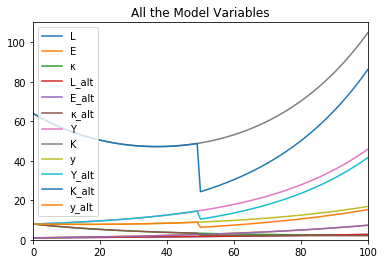

In [7]:
# calculate the remaining variables in the model

# initialize the lists of values:
Y = []
K = []
y = []

Y_alt = []
K_alt = []
y_alt = []

# calculate the variables for the duration of the
# simulation:
for t in range(T+1):
    Y = Y + [(κ[t]**θ)*L[t]*E[t]]
    K = K + [(κ[t]*Y[t])]
    y = y + [Y[t]/L[t]]

# stuff the lists of values into the dataframe:
solow_df['Y'] = Y
solow_df['K'] = K
solow_df['y'] = y

# calculate the variables for the duration of the
# simulation:
for t in range(T_alt+1):
    Y_alt = Y_alt + [(κ_alt[t]**θ)*L_alt[t]*E_alt[t]]
    K_alt = K_alt + [(κ_alt[t]*Y_alt[t])]
    y_alt = y_alt + [Y_alt[t]/L_alt[t]]
    
for t in range(T_alt+1,T+1):
    Y_alt = Y_alt + [(κ_alt[t]**θ)*L_alt[t]*E_alt[t]]
    K_alt = K_alt + [(κ_alt[t]*Y_alt[t])]
    y_alt = y_alt + [Y_alt[t]/L_alt[t]]

# stuff the lists of values into the dataframe:
solow_df['Y_alt'] = Y_alt
solow_df['K_alt'] = K_alt
solow_df['y_alt'] = y_alt

# plot the entire dataframe:
solow_df.plot()

# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('All the Model Variables')
plt.show()

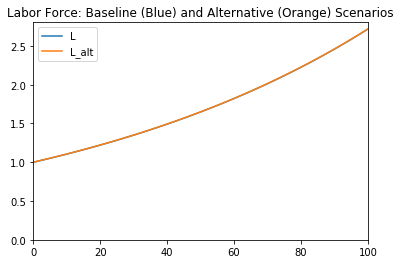

In [8]:
# show the labor force:
solow_df[['L','L_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Labor Force: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()

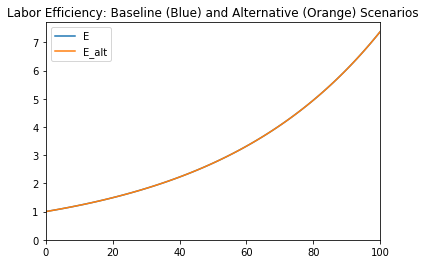

In [9]:
# show labor efficiency:
solow_df[['E','E_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Labor Efficiency: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()

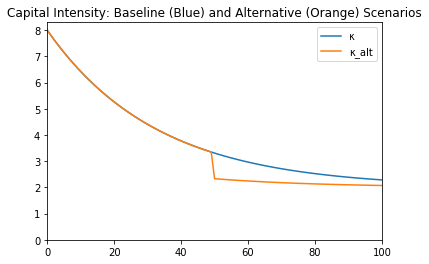

In [10]:
# show capital intensity:
solow_df[['κ','κ_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Capital Intensity: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()

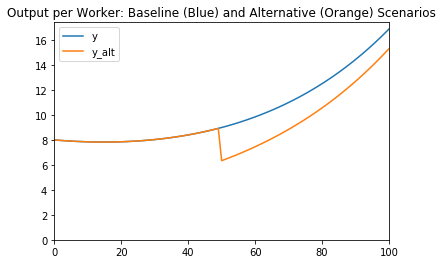

In [11]:
# show output per worker:
solow_df[['y','y_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Output per Worker: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()

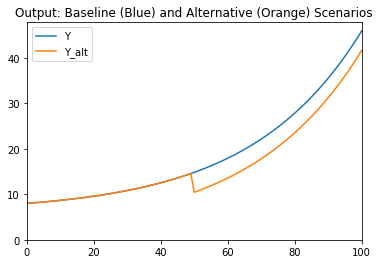

In [12]:
# show output:
solow_df[['Y','Y_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Output: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()

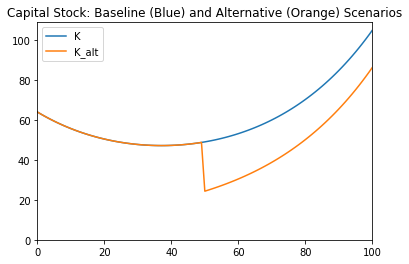

In [13]:
# show the capital stock:
solow_df[['K','K_alt']].plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title("Capital Stock: Baseline (Blue) and Alternative (Orange) Scenarios")
plt.show()